### This implementation is a translation of the [Qiskit Textbook content on solving sudoku using Grover's algorithm](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb).

---

In [1]:
from MiQE import *

For solving a $2 \times 2$ sudoko of the form $ \begin{bmatrix} V_0 & V_1 \\ V_2 & V_3 \end{bmatrix} $:

In [2]:
clause_list = [[0,1], [0,2], [1,3], [2,3]]

In [3]:
def XOR(qc, a, b, output):
    qc.C(X, a, output)
    qc.C(X, b, output)

In [4]:
def sudoku_oracle(qc, clause_list, clause_qubits):
    
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    qc.C(X, clause_qubits, *output_qubit)

    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

In [5]:
var_qubits = [0, 1, 2, 3]
clause_qubits = [4, 5, 6, 7]
output_qubit = [8]
qc = QuantumCircuit(9)

qc.gate(X, *output_qubit)
qc.gate(H, *output_qubit)

qc.gate(H, *var_qubits)

sudoku_oracle(qc, clause_list, clause_qubits)

qc.gate(H, *var_qubits)
qc.gate(X, *var_qubits)
qc.C(Z, var_qubits[:-1], var_qubits[-1])
qc.gate(X, *var_qubits)
qc.gate(H, *var_qubits)

sudoku_oracle(qc, clause_list, clause_qubits)

qc.gate(H, *var_qubits)
qc.gate(X, *var_qubits)
qc.C(Z, var_qubits[:-1], var_qubits[-1])
qc.gate(X, *var_qubits)
qc.gate(H, *var_qubits)

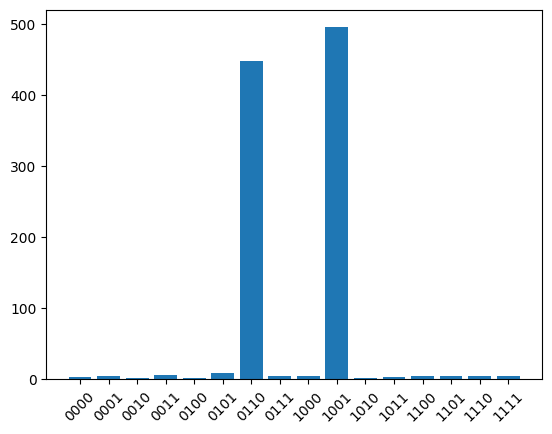

In [6]:
results = []
for _ in range(1000):
    results.append(qc.measure_all(False)[:-5])
states, counts = np.unique(results, return_counts=True)

plt.bar(states, counts)
plt.xticks(rotation=45)
plt.show()

From this plot, we can see that the correct solutions of $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ and $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ have been amplified successfully.